In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('dataset.csv')

In [4]:
main_values=list(dataset['Class'].unique())
for val in main_values:
  dataset.loc[dataset['Class']==val,'Class']=main_values.index(val)

In [5]:
copy_dataset=dataset.copy()

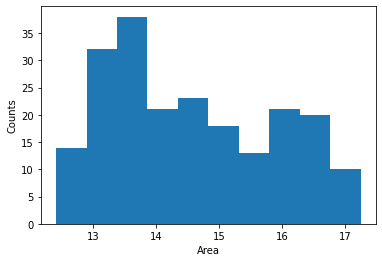

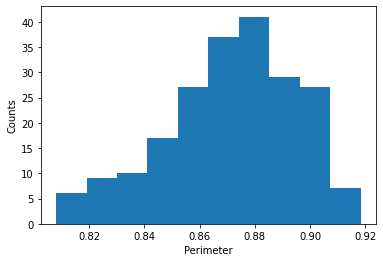

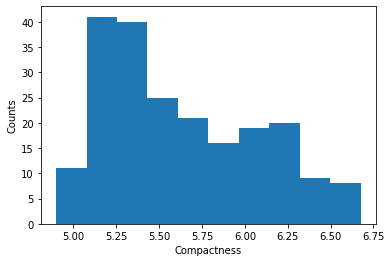

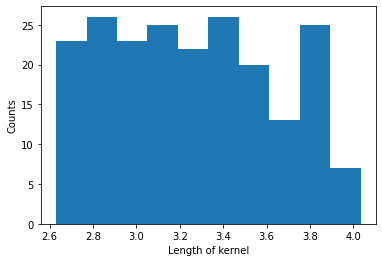

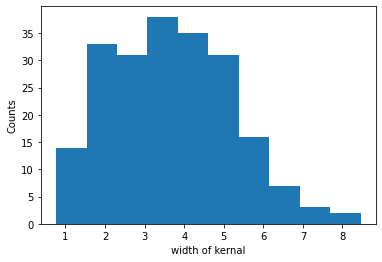

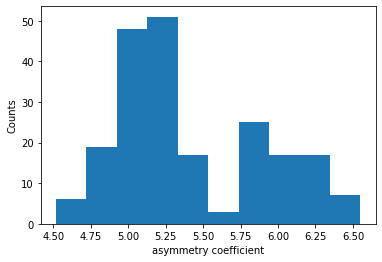

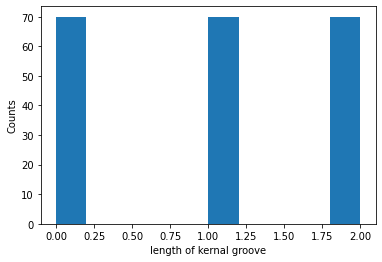

In [6]:
features=['Area','Perimeter','Compactness','Length of kernel','width of kernal','asymmetry coefficient','length of kernal groove']
for i in range(1,8):
  x=dataset.iloc[:,i]
  plt.hist(x)
  plt.xlabel(features[i-1])
  plt.ylabel('Counts')
  plt.show()

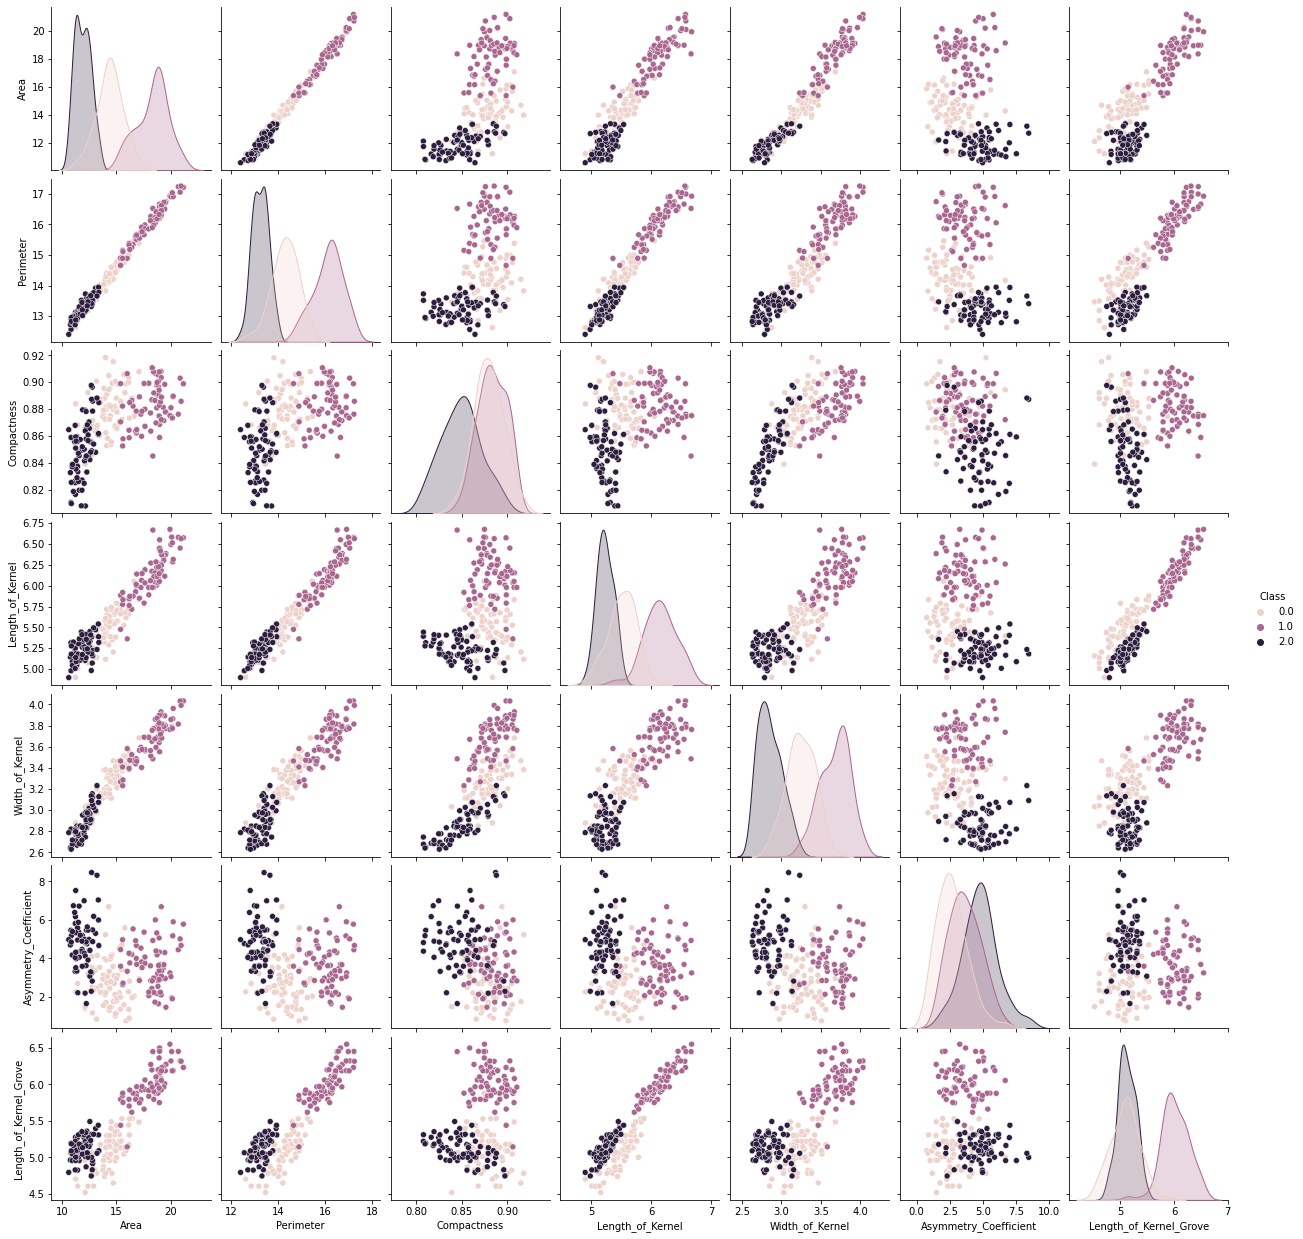

In [7]:
sns.pairplot(dataset,hue='Class')

In [8]:
#Prior probabilities:
class_value=list(dataset['Class'].unique())
Total_length=dataset['Class'].shape[0]
Prob=[]
for i in class_value:
  a=dataset.loc[(dataset['Class'])==i,'Class'].shape[0]
  Prob.append((a/Total_length,i))
Prob  

[(0.3333333333333333, 0.0),
 (0.3333333333333333, 1.0),
 (0.3333333333333333, 2.0)]

In [9]:
(dataset.describe())

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Grove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [10]:
features=['Area','Perimeter','Compactness','Length_of_Kernel','Width_of_Kernel','Asymmetry_Coefficient','Length_of_Kernel_Grove']

L=[]

for feature in features:
  q75=dataset.describe().iloc[6][feature]
  q25=dataset.describe().iloc[4][feature]
  diff=q75-q25
  cbrt=((dataset.shape[0])**(1./3))
  L.append((2*(diff/cbrt)))

bins_list=[]
for feature in features:
  a=dataset[feature].max()
  b=dataset[feature].min()
  d=a-b
  bins_list.append(round(d/L[features.index(feature)]))
  
L  

[1.6941676018001541,
 0.7621230621802085,
 0.010388763595944336,
 0.2414230892336864,
 0.20785939146217383,
 0.7426914476809116,
 0.2799498400591317]

In [11]:
for i in range(len(bins_list)):
  val=bins_list[i]
  Min=dataset[features[i]].min()
  Max=dataset[features[i]].max()
  for j in range(val):  
    if(j!=val-1):
      copy_dataset.loc[(dataset[features[i]]>=Min+(j*L[i]))&(dataset[features[i]]<Min+((j+1)*L[i])),features[i]]=j
    else:
      copy_dataset.loc[dataset[features[i]]>Min+(j*L[i]),features[i]]=j  


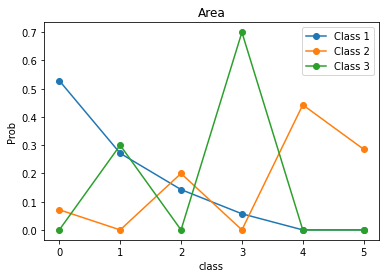

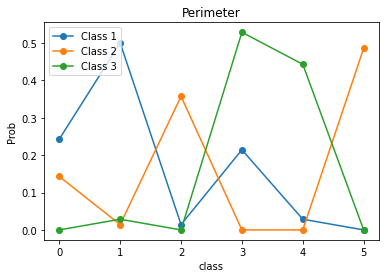

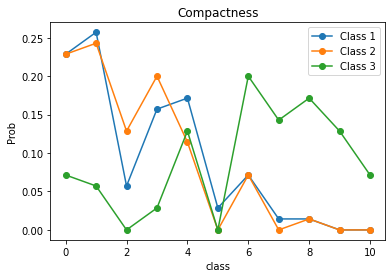

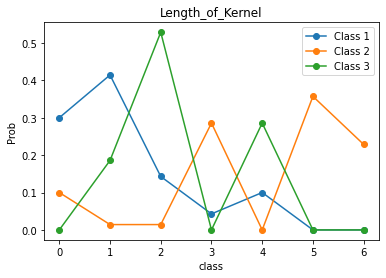

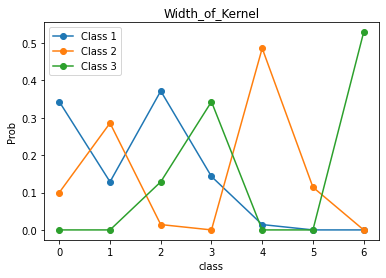

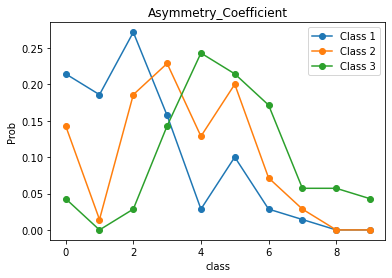

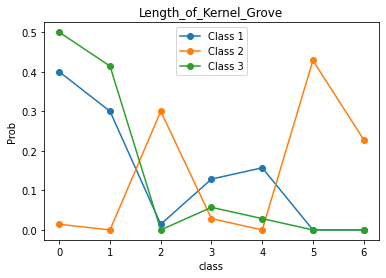

For feature and value Area and  2.0 the likelihood probability for class 0 is  0.5285714285714286 the likelihood probability for class 1 is 0.07142857142857142 the likelihood probability for class 2 is 0.0
For feature and value Area and  1.0 the likelihood probability for class 0 is  0.2714285714285714 the likelihood probability for class 1 is 0.0 the likelihood probability for class 2 is 0.3
For feature and value Area and  3.0 the likelihood probability for class 0 is  0.14285714285714285 the likelihood probability for class 1 is 0.2 the likelihood probability for class 2 is 0.0
For feature and value Area and  0.0 the likelihood probability for class 0 is  0.05714285714285714 the likelihood probability for class 1 is 0.0 the likelihood probability for class 2 is 0.7
For feature and value Area and  4.0 the likelihood probability for class 0 is  0.0 the likelihood probability for class 1 is 0.44285714285714284 the likelihood probability for class 2 is 0.0
For feature and value Area and 

In [22]:
f=[]
for feature in features:
  main_val=list(copy_dataset[feature].unique())
  l_a=[]
  l_b=[]
  l_c=[]
  for val in main_val:
    a=(copy_dataset.loc[((copy_dataset[feature]==val) & (copy_dataset['Class']==0)),feature].shape[0])/copy_dataset[copy_dataset['Class']==0].shape[0]
    b=(copy_dataset.loc[((copy_dataset[feature]==val) & (copy_dataset['Class']==1)),feature].shape[0])/copy_dataset[copy_dataset['Class']==1].shape[0]
    c=(copy_dataset.loc[((copy_dataset[feature]==val) & (copy_dataset['Class']==2)),feature].shape[0])/copy_dataset[copy_dataset['Class']==2].shape[0]
    f.append((feature,a,b,c,val)) 
    l_a.append(a)
    l_b.append(b)
    l_c.append(c)
  plt.plot([i for i in range(len(main_val))],l_a,label='Class 1',marker='o')
  plt.plot([i for i in range(len(main_val))],l_b,label='Class 2',marker='o')
  plt.plot([i for i in range(len(main_val))],l_c,label='Class 3',marker='o')
  plt.title(feature)
  plt.xlabel('class')
  plt.ylabel('Prob')
  plt.legend()
  plt.show()
for elements in f:
  print("For feature and value",elements[0],'and ',elements[4],"the likelihood probability for class 0 is ",elements[1],"the likelihood probability for class 1 is",elements[2],"the likelihood probability for class 2 is",elements[3],)

In [13]:
F=[]
for feature in features:
  main_val=list(copy_dataset[feature].unique())
  p=[]
  for val in main_val:
    a=(copy_dataset.loc[copy_dataset[feature]==val,feature].shape[0])
    p.append(a)
  F.append(p) 
F   

[[42, 40, 24, 53, 31, 20],
 [27, 38, 26, 52, 33, 34],
 [37, 39, 13, 27, 29, 2, 24, 11, 14, 9, 5],
 [28, 43, 48, 23, 27, 25, 16],
 [31, 29, 36, 34, 35, 8, 37],
 [28, 14, 34, 37, 28, 36, 19, 7, 4, 3],
 [64, 50, 22, 15, 13, 30, 16]]

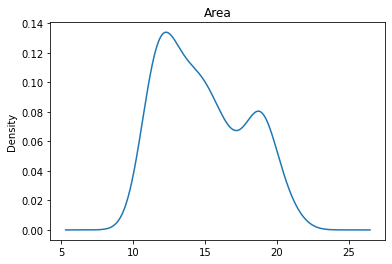

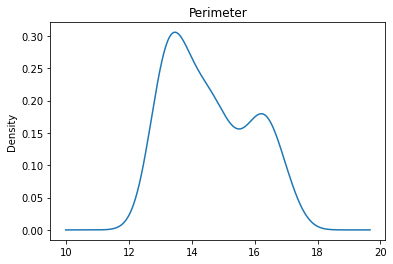

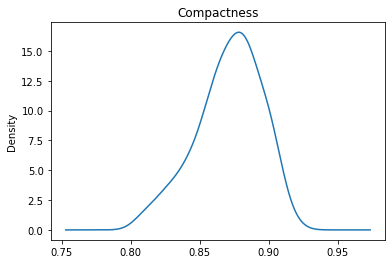

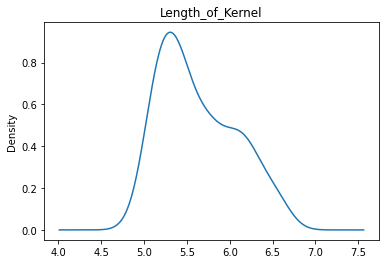

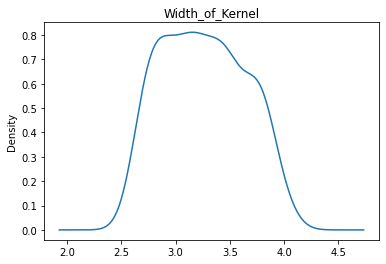

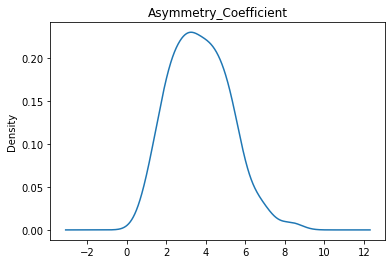

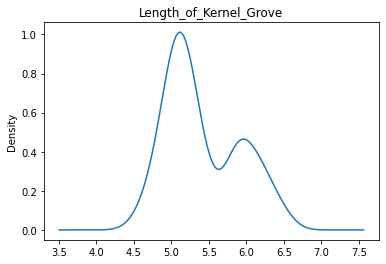

In [35]:
for feature in features:
    plt.title(feature)
    dataset[feature].plot.kde()
    plt.show()
    

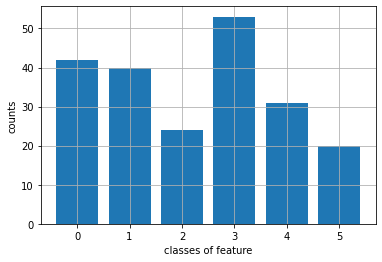

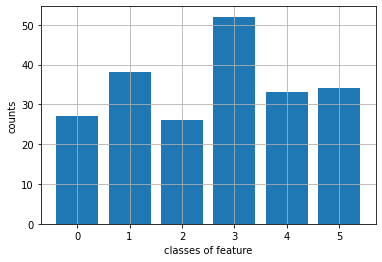

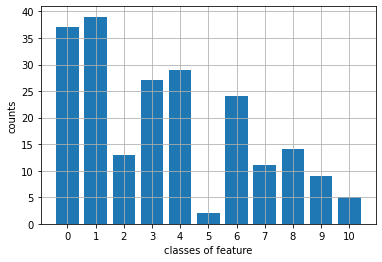

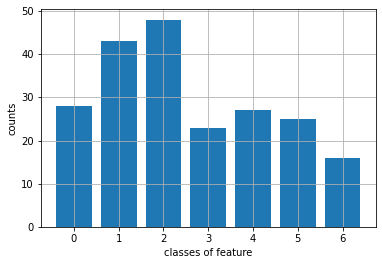

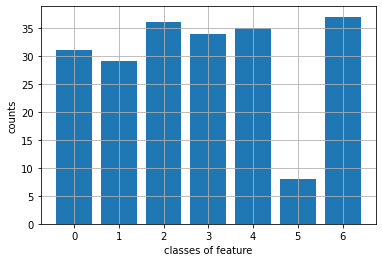

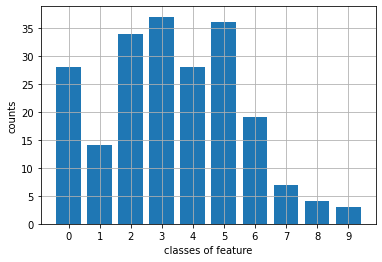

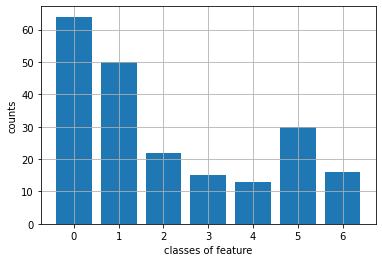

In [31]:
for lists in F:
  x=[i for i in range(len(lists))]
  plt.bar(x,lists)
  plt.xticks(x)
  plt.xlabel("classes of feature")
  plt.ylabel("counts")
  plt.grid()
  plt.show()

In [15]:
def likelihood_probab(dataset,feature,cls):
  main_val=list(dataset[feature].unique())
  L=[]
  for val in main_val:
    count_of_element=dataset.loc[(dataset[feature]==val) & (dataset['Class']==cls),feature].shape[0]
    prob=count_of_element/dataset[dataset['Class']==cls].shape[0]
    L.append(prob)
  return L

In [16]:
def post_prob(dataset,feature):
  class_0=likelihood_probab(dataset,feature,0)
  class_1=likelihood_probab(dataset,feature,1)
  class_2=likelihood_probab(dataset,feature,2)
  L1=[]
  main_val=list(dataset[feature].unique())
  for val in main_val:
    tot=dataset[dataset[feature]==val].shape[0]
    denominator=dataset['Class'].shape[0]
    L1.append(tot/denominator)
  L2=[]  
  for i in range(3):
    tot=dataset[dataset['Class']==i].shape[0]
    denominator=dataset[feature].shape[0]
    L2.append(tot/denominator)
  Ans=[]
  for i in range(3):
    op=[]
    for j in range(len(class_0)):
      if(i==0):
        prob=(class_0[j]*L2[i])/L1[j]
        op.append(prob)
      elif(i==1):
        prob=(class_1[j]*L2[i])/L1[j]
        op.append(prob)
      else:
        prob=(class_2[j]*L2[i])/L1[j]
        op.append(prob)
    Ans.append(op)      
  return Ans

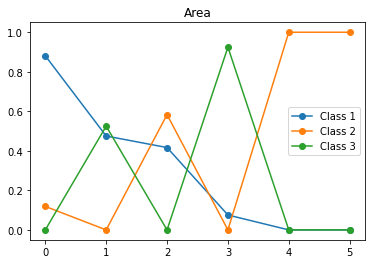

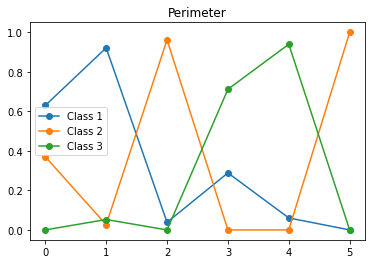

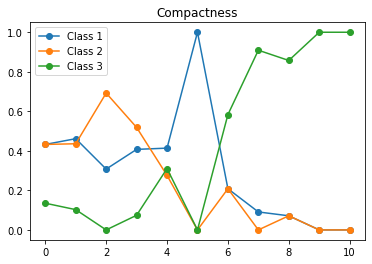

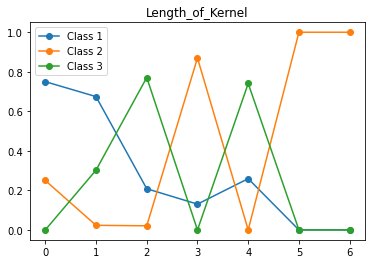

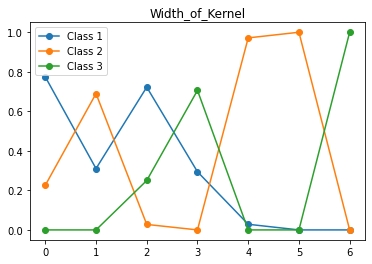

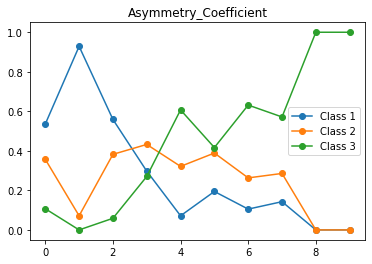

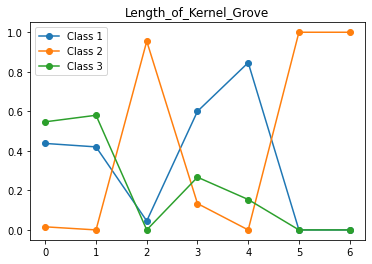

In [44]:

for feature in features: 
    post_prob(copy_dataset,feature)
    plt.title(feature)
    plt.plot([i for i in range(len(list(copy_dataset[feature].unique())))],post_prob(copy_dataset,feature)[0],label='Class 1',marker='o')
    plt.plot([i for i in range(len(list(copy_dataset[feature].unique())))],post_prob(copy_dataset,feature)[1],label='Class 2',marker='o')
    plt.plot([i for i in range(len(list(copy_dataset[feature].unique())))],post_prob(copy_dataset,feature)[2],label='Class 3',marker='o')
    plt.legend()
    plt.show()